# importing dependencies libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import svm

In [2]:
#loading te csv data to a pandas data frame
from google.colab import files

In [3]:
#loading te csv data to a pandas data frame
auto_insurance=pd.read_csv('/content/auto insurance 1 (1).csv')

In [4]:
# print first 5 rows in the data frame
auto_insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
# print last 5 rows of the data frame
auto_insurance.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11/11/1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
# number of rows and columns
auto_insurance.shape

(1000, 40)

In [7]:
# getting some basic information about the data
auto_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Checking the null value

In [8]:
auto_insurance.isna().apply(pd.value_counts) # null value check

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
False,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,NaN
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0


In [9]:
# checking the number of missing values
auto_insurance.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
# getting the statistical measures of the data
auto_insurance.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


correlation:
1.Positive correlation
2.Negative correlation

In [16]:
correlation= auto_insurance.corr()

<Axes: >

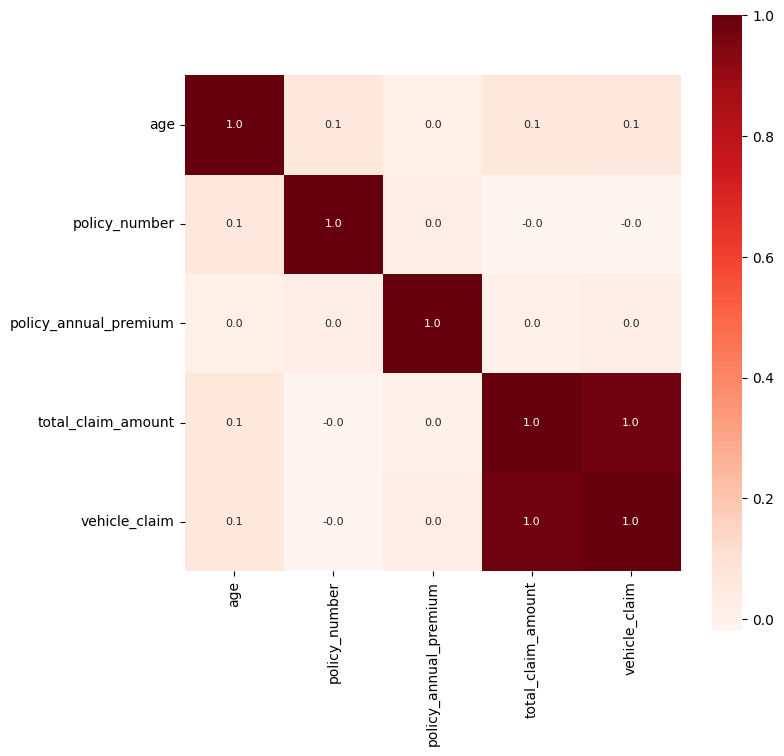

In [17]:
# constructing a heat map to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [18]:
# correlation values of policy_annual_premium
print(correlation['policy_annual_premium'])

age                      0.014404
policy_number            0.022566
policy_annual_premium    1.000000
total_claim_amount       0.009094
vehicle_claim            0.020246
Name: policy_annual_premium, dtype: float64


<ipython-input-13-fda76efada3c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto_insurance['policy_annual_premium'],color='green')


<Axes: xlabel='policy_annual_premium', ylabel='Density'>

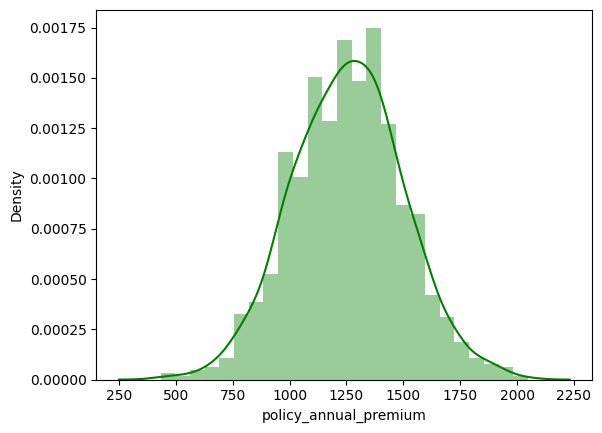

In [13]:
# checking the distribution of the policy_annual_premium
sns.distplot(auto_insurance['policy_annual_premium'],color='green')

clean data csv saving

In [12]:
# dropping other features
# Load the dataset into a pandas dataframe
auto_insurance = pd.read_csv('auto insurance 1 (1).csv')

# Drop multiple columns at once
auto_insurance = auto_insurance.drop(['months_as_customer','injury_claim','auto_year','property_claim','witnesses','bodily_injuries','number_of_vehicles_involved','incident_hour_of_the_day','umbrella_limit','policy_deductable','capital-gains','capital-loss','insured_zip','_c39','incident_date','policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported'],axis=1)

# Save the updated dataframe to a new CSV file
auto_insurance.to_csv('policy_annual_premium_cleaned.csv', index=False)

#print the updated dataframe
print(auto_insurance.head())

   age  policy_number  policy_annual_premium  total_claim_amount  \
0   48         521585                1406.91               71610   
1   42         342868                1197.22                5070   
2   29         687698                1413.14               34650   
3   41         227811                1415.74               63400   
4   44         367455                1583.91                6500   

   vehicle_claim  
0          52080  
1           3510  
2          23100  
3          50720  
4           4550  


In [19]:
# Correlation Analysis
correlation = auto_insurance.corr()
print(correlation['policy_annual_premium'])

age                      0.014404
policy_number            0.022566
policy_annual_premium    1.000000
total_claim_amount       0.009094
vehicle_claim            0.020246
Name: policy_annual_premium, dtype: float64


In [20]:
auto_insurance.isna().apply(pd.value_counts) # null value check

,age,policy_number,policy_annual_premium,total_claim_amount,vehicle_claim
False,1000,1000,1000,1000,1000


In [21]:
auto_insurance.head()

,age,policy_number,policy_annual_premium,total_claim_amount,vehicle_claim
0,48,521585,1406.91,71610,52080
1,42,342868,1197.22,5070,3510
2,29,687698,1413.14,34650,23100
3,41,227811,1415.74,63400,50720
4,44,367455,1583.91,6500,4550


splitting into into Training data and Test data


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score



# Load the dataset into a pandas dataframe
auto_insurance = pd.read_csv('policy_annual_premium_cleaned.csv')

# Split the dataset into features (X) and target variable (y)
X = auto_insurance.drop('policy_annual_premium', axis=1)
y = auto_insurance['policy_annual_premium']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 4)
y_train shape: (800,)
X_test shape: (200, 4)
y_test shape: (200,)


Model Training:RandomForestRegressor


In [23]:
regressor=RandomForestRegressor(n_estimators=100)

In [24]:
#training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
# predict on test data
test_data_prediction=regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[1205.0497 1274.7563 1249.4103 1369.6622 1205.836  1350.9559 1276.5835
 1279.6938 1259.588  1334.7943 1337.2249 1211.0443 1157.9634 1248.6749
 1242.3217 1391.6977 1281.3874 1241.1334 1290.9673 1212.0557 1253.8921
 1158.9324 1459.3898 1214.4484 1029.5689 1432.7527 1225.1294 1316.5093
 1245.99   1269.7146 1273.4761 1275.9412  999.327  1189.0945 1158.0981
 1362.0221 1263.1524 1075.9205 1086.7324 1311.4489 1305.7664 1362.9807
 1197.3853 1352.1326 1203.9195 1312.9363 1309.3899 1176.1324 1131.2578
  937.6883 1258.2207 1349.4265 1129.1    1235.1476 1202.5632 1211.0901
 1215.4162 1264.7063 1302.7374 1155.8457 1249.2187 1246.2532 1243.1172
 1266.2    1221.8326 1263.7457 1339.3655 1300.881  1289.8389 1117.8993
 1203.6518 1289.3463 1211.1238 1340.4596 1274.6729 1209.0843 1276.9687
 1491.7446 1173.622  1292.6923 1173.535  1121.6766 1312.9421 1231.5156
 1195.9716 1311.8566 1329.0089 1198.9992 1237.706  1243.953  1511.3369
 1311.0208 1450.4539 1256.6927 1301.3671 1174.2973 1243.3628 1314.8107
 1258.

In [27]:
# R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: -0.12341475835057891


Compare the Actual values and the predicted values in the plot

In [28]:
y_test=list(y_test)

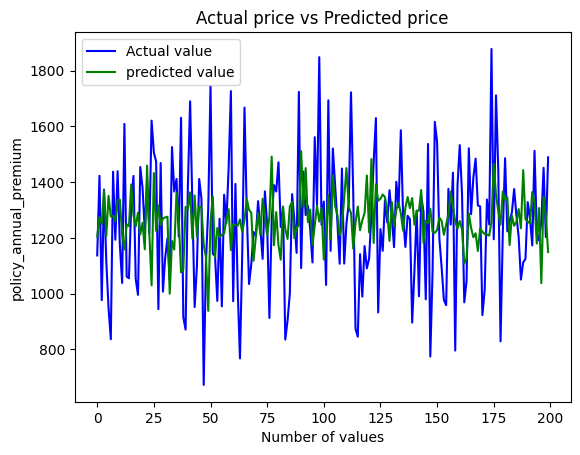

In [29]:
plt.plot(y_test,color='blue', label='Actual value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('policy_annual_premium')
plt.legend()
plt.show()

training model

In [30]:
regressor = LinearRegression()

Fit regressor on training

In [31]:
regressor.fit(X_train, y_train)

LinearRegression()

predict test data

In [32]:
y_pred = regressor.predict(X_test)

Model evaluation

In [33]:
#  Mean squared error and r squared
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Y_test: actual target values of the test set
# Y_pred: predicted target values of the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)


Mean Squared Error: 50791.078324980976
Mean Absolute Error: 177.44429368136443


Accuracy test

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Generate some example data
# Replace this with your actual data
X = np.random.rand(100, 10)  # Features
y = np.random.randint(2, size=100)  # Binary labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.6625
Testing Accuracy: 0.3


predictive system

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the auto_insurance
auto_insurance = pd.read_csv('policy_annual_premium_cleaned.csv')

# define the feature and target columns
X = auto_insurance[[
	'age',	'policy_number','total_claim_amount','vehicle_claim'	]]
y = auto_insurance['policy_annual_premium']

# split the auto_insurance into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# use the trained model to make predictions on new data
input_data = [[48,	521585,	71610, 52080]]
predicted_policy_annual_premium = model.predict(input_data)[0]

# print the predicted price
print("Predicted policy annual premium in USD Dollars: $",predicted_policy_annual_premium )

Predicted policy annual premium in USD Dollars: $ 1274.288188752941


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Saving the trained model

In [42]:
import pickle

In [43]:
filename = 'trained_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [44]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [48]:
import pandas as pd
import numpy as np

def predict_policy_annual_premium('age',	'policy_number','total_claim_amount','vehicle_claim'):
    auto_insurance = {

        'age': age,
        'policy_number': policy_number,
        'total_claim_amount': total_claim_amount,
        'vehicle_claim': vehicle_claim

    }

    features = pd.DataFrame(auto_insurance, index=[0])
    policy_annual_premium = model.predict(features)[0]
    return policy_annual_premium


# print
print("Predicted Price in USD Dollars: $", predicted_policy_annual_premium)


SyntaxError: invalid syntax (<ipython-input-48-1def6d418542>, line 4)